# Задание 1. KNN

In [63]:
import numpy as np
import pandas as pd
import matplotlib as mpl

from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [64]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1)

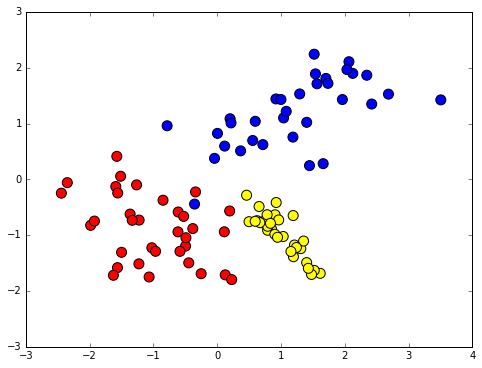

In [65]:
colors = ListedColormap(['red', 'blue', 'yellow'])
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), 
              map(lambda x: x[1], classification_problem[0]), 
              c = classification_problem[1], 
              s = 100,
              cmap = colors)

In [66]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [67]:
from sklearn.neighbors import KNeighborsClassifier


clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.93333333333333335

In [69]:
predictions

array([1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0])

## KNN Surface

In [70]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [71]:
light_colors = ListedColormap(['lightcoral', 'lightyellow', 'lightgreen'])
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

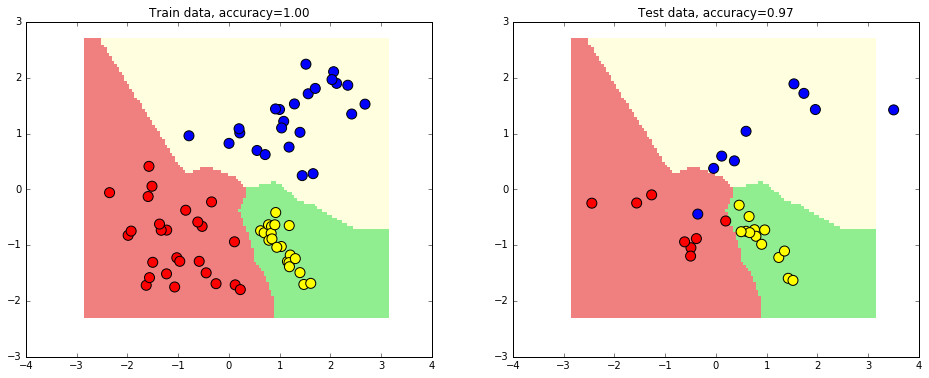

In [72]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [73]:
from sklearn.cross_validation import cross_val_score

In [74]:
def func(i):
    estimator = KNeighborsClassifier(n_neighbors = i)
    cvs = cross_val_score(estimator, classification_problem[0], classification_problem[1])
    return cvs[1]

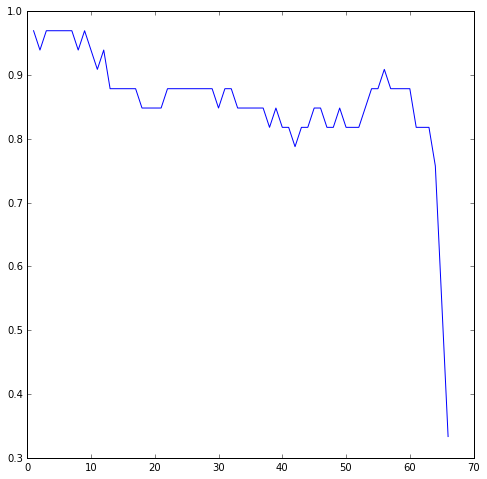

In [80]:
x = np.arange(1, 67)
pyplot.figure(figsize(8, 8))
pyplot.plot(x, map(func, x))
pyplot.show()

# Задание 2. Bayes classifier

In [90]:
digits = datasets.load_digits()
breat_cancer = datasets.load_breast_cancer()

In [91]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

# Digits

In [124]:
print("BernoulliNB - " + str(cross_val_score(BernoulliNB(), digits.data, digits.target).mean()))

print("GaussianNB - "+ str(cross_val_score(GaussianNB(), digits.data, digits.target).mean()))

print("MultinomialNB - " + str(cross_val_score(MultinomialNB(), digits.data, digits.target).mean()) + " ----- MAX")

BernoulliNB - 0.825823650778
GaussianNB - 0.818600380355
MultinomialNB - 0.870877148974 ----- MAX


# Breast_cancer

In [123]:
print("BernoulliNB - " + str(cross_val_score(BernoulliNB(), breat_cancer.data, breat_cancer.target).mean()))

print("GaussianNB - "+ str(cross_val_score(GaussianNB(), breat_cancer.data, breat_cancer.target).mean()) + " ----- MAX")

print("MultinomialNB - " + str(cross_val_score(MultinomialNB(), breat_cancer.data, breat_cancer.target).mean()))

BernoulliNB - 0.627420402859
GaussianNB - 0.936749280609 ----- MAX
MultinomialNB - 0.894579040193


1) Gaussian
2) Multinomial
3) d

# Задание 3. Metrics

In [130]:
import random
from sklearn import metrics
from scipy import optimize


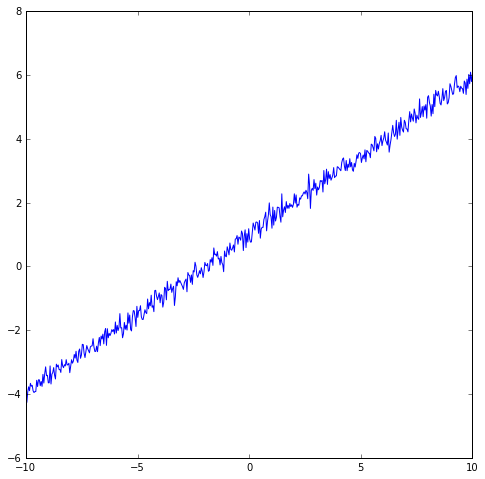

In [128]:
x = np.linspace(-10, 10, 500)
y = 0.5 * x + 1.0 + 0.2 * np.random.randn(500)
plt.plot(x,y)

In [240]:
def f(kb):
    k, b = kb
    return sum((y - k * x - b) ** 2)
opt = optimize.minimize(f,[0,0] )


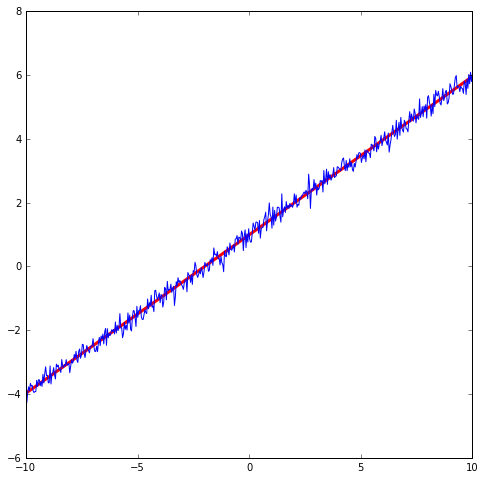

In [241]:
plt.plot(x, opt.x[0] * x + opt.x[1],  color = 'red', linewidth = 3)
plt.plot(x,y)

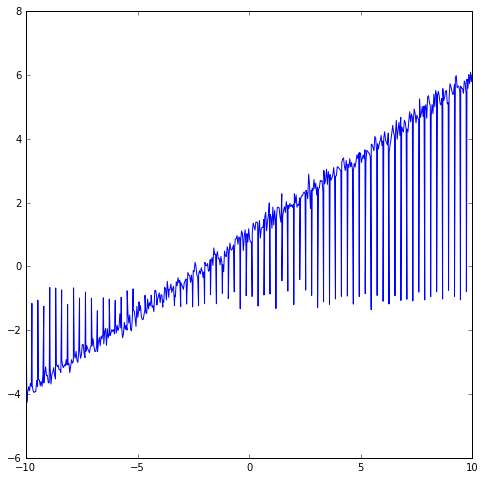

In [230]:
xx = np.arange(-10.0, 10.0, 20.0/75.0)
yy = -1 + 0.2 * np.random.randn(75)

x1 = np.hstack((x, xx))
y1 = np.hstack((y, yy))
a = zip(_x, _y)
a.sort()
x1 = np.array(zip(*a)[0])
y1 = np.array(zip(*a)[1])
plt.plot(x1,y1)


In [233]:
def mse(s):
    return metrics.mean_squared_error(s[0] + s[1] * x1, y1)

def mae(s):
    return metrics.mean_absolute_error(s[0] + s[1] * x1, y1)

In [249]:
coef_1 = optimize.minimize(mse, [0.0, 0.0])
coef_2 = optimize.minimize(mae, [0.0, 0.0])

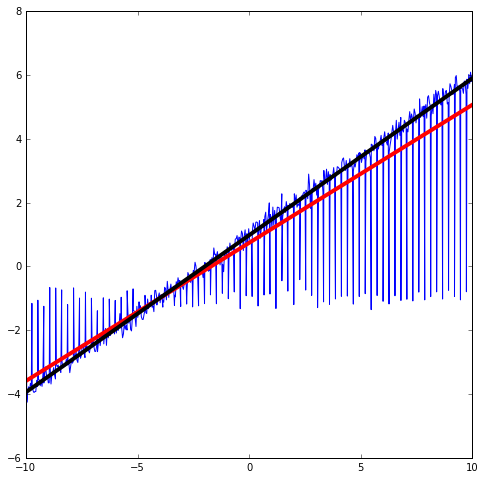

In [252]:
plt.plot(x1,y1)
plt.plot(x1, coef_1.x[0] + coef_1.x[1]*x1,  color = 'red', linewidth=4) #mse
plt.plot(x1, coef_2.x[0] + coef_2.x[1]*x1, linewidth=4, color = 'black') #mae

MAE более устойчива к выбросам, чем MSE

# Задание 4. Decision Tree

In [290]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer


In [266]:
data = pd.read_csv("german.data", sep=' ')

In [281]:
data.head()

,Account_Status,Duration,CreditHistory,Purpose,CreditAmmount,SavingsAccount,PresentEmploymentSince,InstallimentRate,PersStatusAndSex,OtherDebtors,...,Property,Age,OtherPlans,Housing,NumOfCredits,Job,NumberOfPeopleProvideMaint,Telephone,Foreign,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [298]:
x = data.drop('Target', axis = 1)
y = data['Target']

In [307]:
dat = ['Account_Status','CreditHistory', 'Purpose', 'SavingsAccount', 'PresentEmploymentSince',
            'PersStatusAndSex', 'OtherDebtors', 'Property', 'OtherPlans', 'Housing', 'Job', 'Telephone', 'Foreign']
g = x.drop(dat, axis = 1)
xdd = x[dat]

In [301]:
x_in = np.hstack([g, xe])

In [294]:
def fd(k):
    return cross_val_score(DecisionTreeRegressor(max_depth = k), x_in, y).mean()